In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib.animation import FuncAnimation

In [9]:
import numpy as np

In [4]:
help(FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in *frames*.   Any additional positional
 |     arguments can be supplied via the *fargs* parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists
 |  
 |     If ``blit == True``, *func* must return an iterable of all artists
 |     that were modified or created. This information is used by the blitting
 |     algorithm to determine which parts of the figure have to be 

<IPython.core.display.Javascript object>


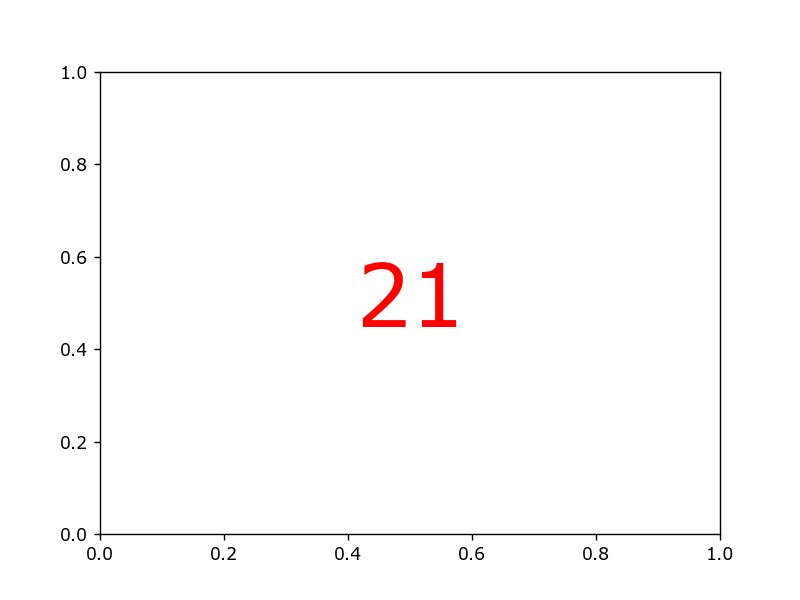

In [5]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot()

text = ax.text(0.5, 0.5, 'Text', transform = ax.transAxes, va = 'center', ha = 'center', fontsize = 50, color = 'r')
def func(i):
    text.set_text(str(i))
#setting 25 frames
#the interval between 2 consecutive frames is 1 second (1000ms)
FuncAnimation(fig = fig, func = func, frames = 25, interval = 1000)

Traceback (most recent call last):
  File "C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


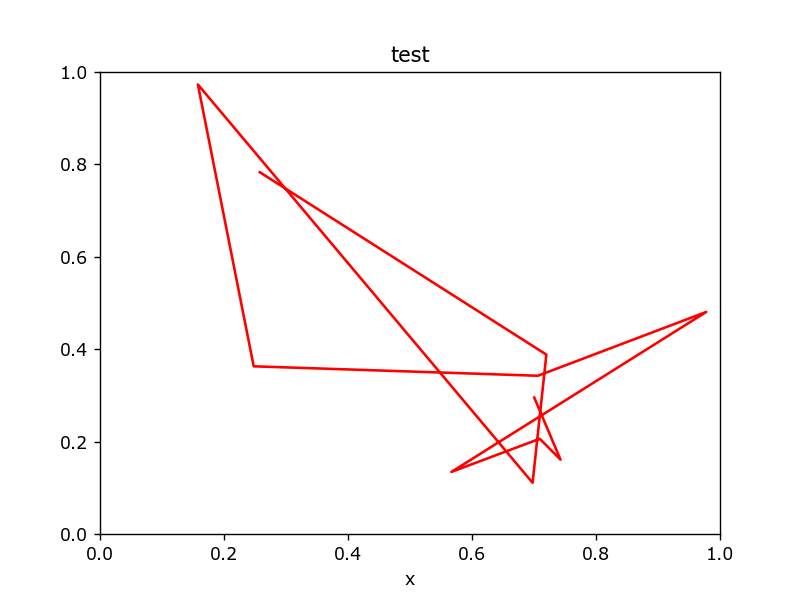

In [42]:
%matplotlib notebook
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,
fig1 = plt.figure()
# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

<IPython.core.display.Javascript object>


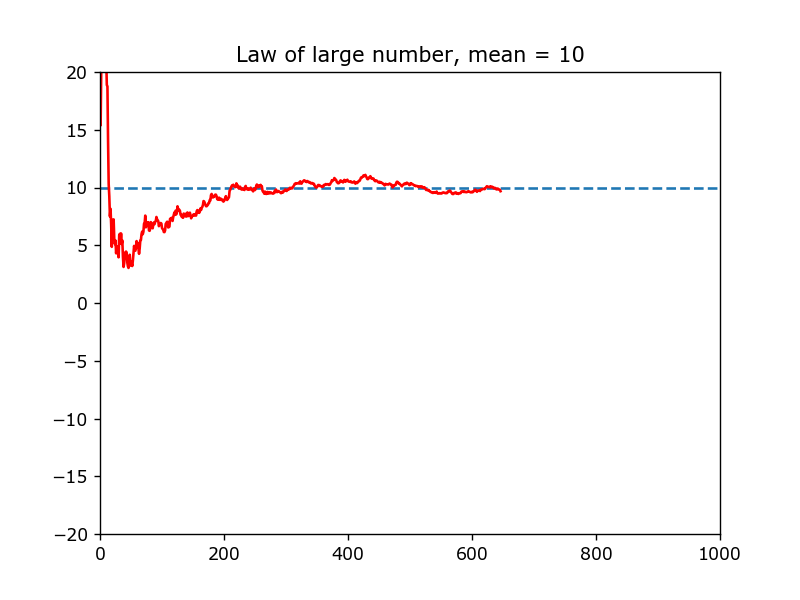

(2, 1000)


In [53]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.set(xlim = (0, 1000), ylim = (-20, 20), title = 'Law of large number, mean = 10')
ax.axhline(y = 10, ls = '--')
n_sample = 1000
np.random.seed(42)
sample = np.random.normal(loc = 10, scale = 30, size = n_sample)
cummean = np.cumsum(sample) / (1 + np.arange(len(sample)))
data = np.stack((np.arange(n_sample), cummean), axis = 0)
print(data.shape)
line, = ax.plot([], [], '-r')
def func(i, data, line):
    line.set_data(data[...,:i])
    return line,
FuncAnimation(fig, func, frames = n_sample, fargs=(data, line),
                                   interval=10, blit=True)